In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(15.0,10.0)

In [2]:
data=pd.read_csv("headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.shape

(237, 4)

In [4]:
X=data["Head Size(cm^3)"].values

Y=data["Brain Weight(grams)"].values

In [5]:
#mean
mean_x=np.mean(X)
mean_y=np.mean(Y)

n=len(X)

numer=0
denom=0

#calculating b0 b1
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2

b1=numer/denom
b0=mean_y-(b1*mean_x)

print(b0,b1)

325.57342104944223 0.26342933948939945


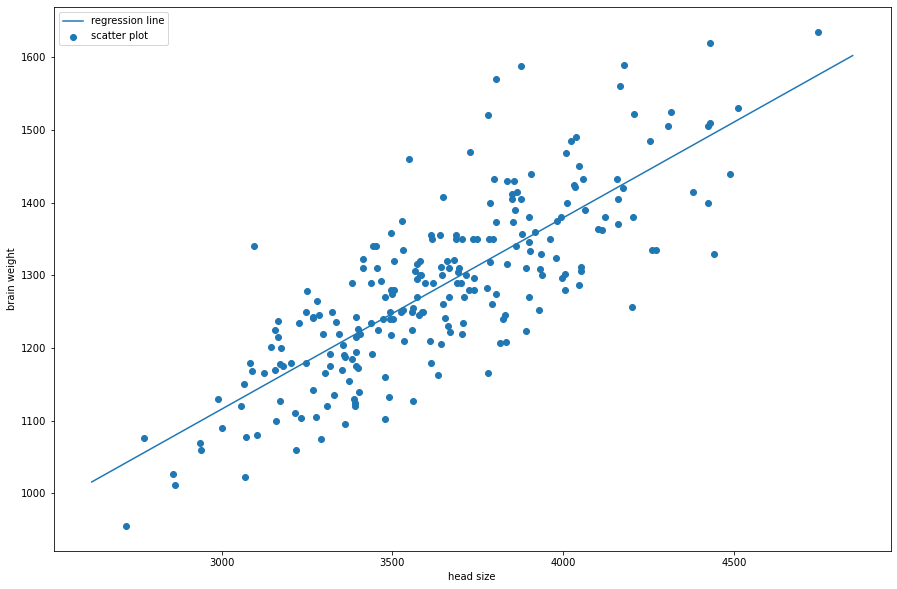

In [6]:
max_x=np.max(X)+100
min_x=np.min(X)-100

x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

plt.plot(x,y,label="regression line")

plt.scatter(X,Y,label="scatter plot")

plt.xlabel("head size")
plt.ylabel("brain weight")
plt.legend()
plt.show()

In [7]:
ss_t=0
ss_r=0

for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


# Using SKlearn

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.reshape((n,1))

reg=LinearRegression()

reg=reg.fit(X,Y)

Y_pred=reg.predict(X)

r2_score=reg.score(X,Y)

print(r2_score)

0.639311719957


In [13]:
reg.predict([[4512]])

array([1514.16660083])